In [4]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

# Распределение Парето

[Ссылка на Wikipedia](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE)

Плотность распределения:

![Формула распределения](https://wikimedia.org/api/rest_v1/media/math/render/svg/6f6401fa65e48cb1a4dbbd3b858041cd0f9a25fa)

Матожидание: $\large \mathbb{E}[X] = \frac{kx_m}{k - 1}$

Дисперсия: $\large D[X] = (\frac{x_m}{k - 1})^2 \frac{k}{k - 2}$

Возьмем $x_m = 1, k - 1$

In [1]:
def get_distribution_density(x, k):
    """
    Функция для генерации плотности распределения по заданному альфа.
    """
    x = x.astype(np.float)

    x[x < 1] = 0
    x[x >= 1] = k / (x[x >= 1] ** (k + 1))
    return x

In [2]:
k = 3

### Плотность вероятности по выборке размером 1000 и теоретиче

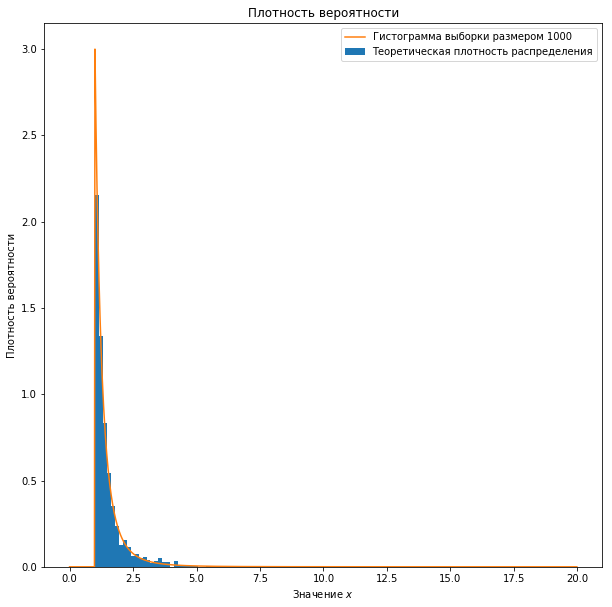

In [9]:
start, end, count = 0, 20, 1000
step = (end - start) / float(count)

x = np.arange(start, end, step)
y_real = scipy.random.pareto(k, count) + 1
y_theory = get_distribution_density(x, k)

fig = plt.figure(figsize=(10, 10))
plt.hist(y_real, bins=50, density=True)
plt.plot(x, y_theory)
plt.legend([u'Гистограмма выборки размером 1000', u'Теоретическая плотность распределения'])
plt.xlabel(u'Значение $x$')
plt.ylabel(u'Плотность вероятности')
plt.title(u'Плотность вероятности')
plt.show()

### Оценка распределений средних и их приближение с помощью центральной предельной теоремы

In [28]:
Ex = k / float(k - 1) # матожидание
Dx = (1. / (k - 1)) ** 2 * (k / float(k - 2)) # дисперсия
Ex, Dx

(1.5, 0.75)

In [29]:
sigma = lambda n: np.sqrt(Dx / n) # стандартное отклонение для ЦПТ

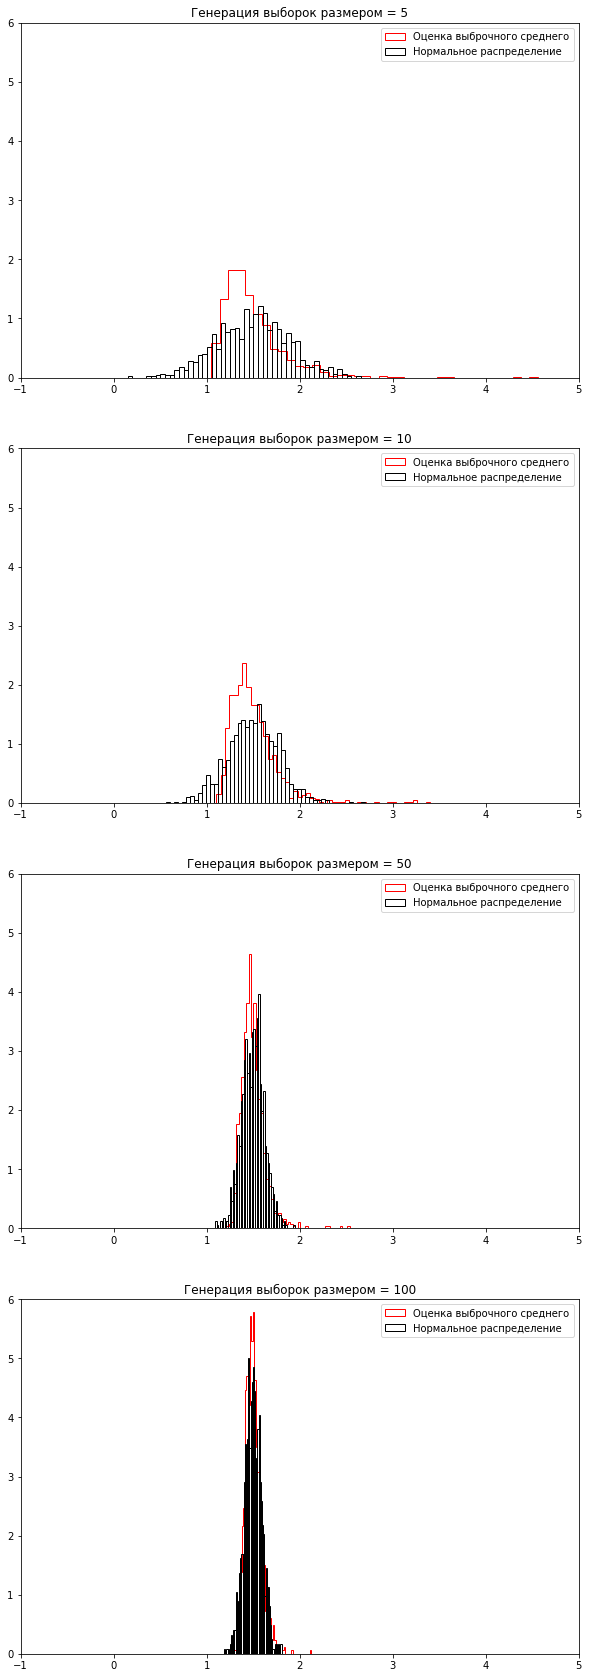

In [32]:
n_list = [5, 10, 50, 100]
fig, ax = plt.subplots(nrows=len(n_list), figsize=(10, 30))

for index, n in enumerate(n_list):
    sample_means = []
    for i in xrange(count):
        x = scipy.random.pareto(k, n) + 
        sample_means.append(x.sum() / n)
        
    ax[index].hist(sample_means, bins=50, fill=False, histtype='step', color='red', density=True)
    ax[index].set_title(u'Генерация выборок размером = ' + str(n))
    
    x_normal = np.random.normal(Ex, sigma(n), 1000)
    ax[index].hist(x_normal, bins=50, fill=False, color='blue', density=True)
    ax[index].legend([u'Оценка выброчного среднего', u'Нормальное распределение'])
    ax[index].axis([-1, 5, 0, 6])
plt.show()

## Вывод

При n > 50 нормальное распределение начинает достаточно хорошо описывать выброчные средние
С увеличением n точность описания повышается